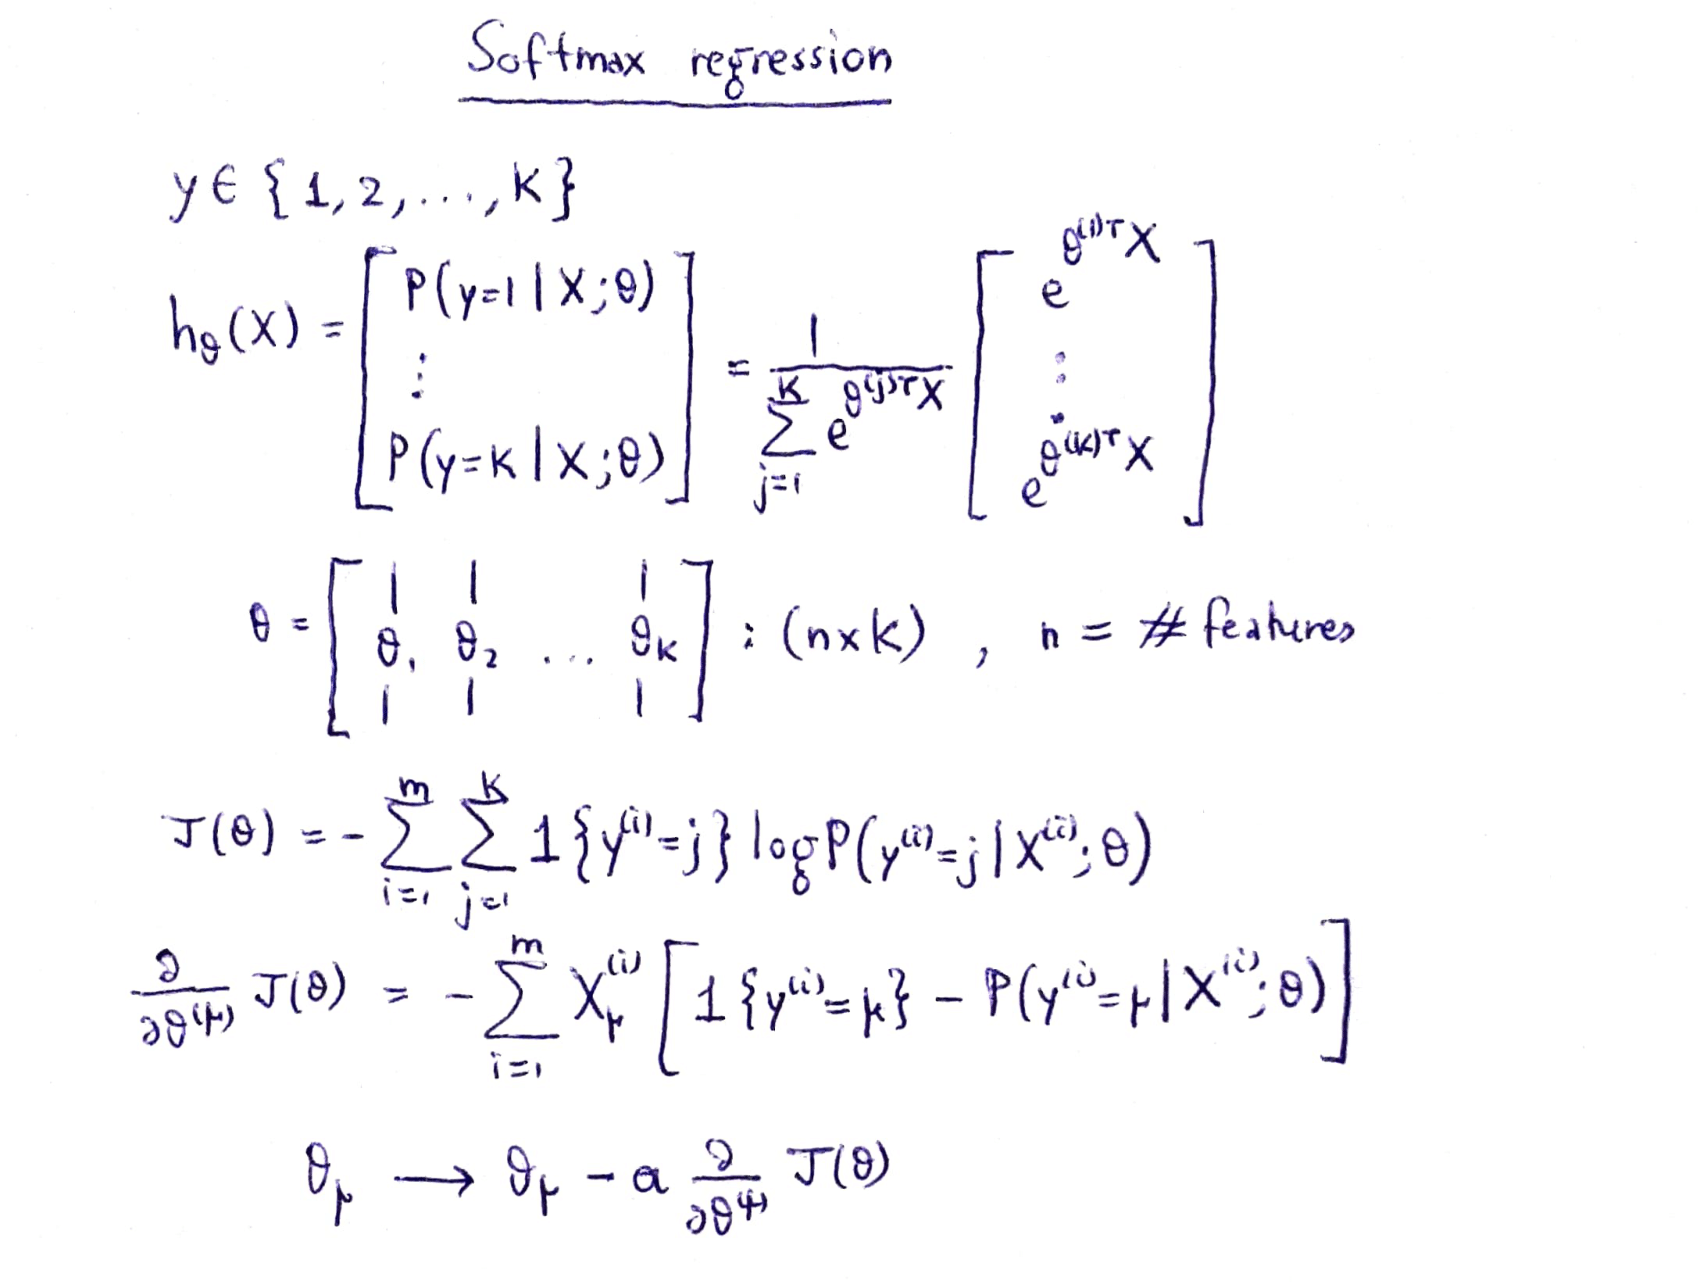

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
X = digits['data']
y = digits['target']
X.shape, y.shape

((1797, 64), (1797,))

<Figure size 640x480 with 0 Axes>

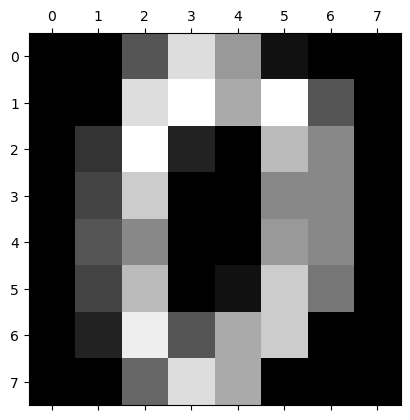

In [4]:
# plt.gray() - set the colormap to gray
plt.gray()
# plt.matshow() - display an array as a matrix in a new figure window
#                 return AxesImage
plt.matshow(digits['images'][0])

In [5]:
def one_hot(y, num_classes):
    m = len(y)
    y_hot = np.zeros((m, num_classes))
    for i in range(m):
        y_hot[i, y[i]] = 1
    return y_hot

In [6]:
def softmax(z):
    prob = np.exp(z)
    for i in range(len(z)):
        prob[i] = prob[i] / np.sum(prob[i])
    return prob

In [7]:
def cross_entropy_loss(prob, y):
    # y is not one_hot in this loss function
    return -np.mean(np.log(prob[np.arange(len(y)), y]))

In [12]:
def fit(X, y, lr, num_classes, epochs, alpha):
    m, n = X.shape
    w = np.random.random((n, num_classes))
    b = np.random.random(num_classes)
    cost_history = []
    best_cost = 999
    
    try:
        for epoch in range(epochs):
            z = X.dot(w) + b
            y_hot = one_hot(y, num_classes)
            prob = softmax(z)
            w_grad = (1/m) * np.dot(X.T, (prob-y_hot))
            b_grad = (1/m) * np.sum(prob-y_hot)
            w = w - lr*w_grad
            b = b - lr*b_grad
            cost = cross_entropy_loss(prob, y)
            cost = cost + alpha * (1/2*np.sum(np.square(w))) # l2 regularization
            if cost < best_cost:
                best_cost = cost
            else:
                raise UnboundLocalError
            cost_history.append(cost)
            if epoch % 200 == 0:
                print(f'at epoch {epoch} the cost is {cost}')
    except UnboundLocalError:
        print('early stop')
        print(epoch, cost)
        
    return w, b, cost_history

In [13]:
num_classes = 10
lr = 0.01
num_epochs = 100000
alpha = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
weights, biases, cost_history = fit(X_train, y_train, lr, num_classes, num_epochs, alpha)

at epoch 0 the cost is 61.11234501716692
at epoch 200 the cost is 30.886843687009396
at epoch 400 the cost is 30.528755483612876
at epoch 600 the cost is 30.368956362411744
at epoch 800 the cost is 30.27791822407693
at epoch 1000 the cost is 30.225213655059928
at epoch 1200 the cost is 30.19642756546144
at epoch 1400 the cost is 30.18201296084458
at epoch 1600 the cost is 30.17634511189455
early stop
1692 30.175810160475464


In [14]:
def predict(X, w, b):
    z = X.dot(w) + b
    prob = softmax(z)
    predicted_class = np.argmax(prob, axis=1)
    return predicted_class

In [15]:
def accuracy(y_pred, y):
    m = len(y)
    return np.sum(y_pred == y) / m

In [17]:
train_predictions = predict(X_train, weights, biases)
train_accuracy = accuracy(train_predictions, y_train)
test_predictions = predict(X_test, weights, biases)
test_accuracy = accuracy(test_predictions, y_test)
print(f'train accuracy: {train_accuracy}, test accuracy: {test_accuracy}')

train accuracy: 0.9845392702535559, test accuracy: 0.9611111111111111


actual class 0 predicted class 0
actual class 1 predicted class 1
actual class 2 predicted class 2
actual class 3 predicted class 3
actual class 4 predicted class 4
actual class 5 predicted class 9


<Figure size 640x480 with 0 Axes>

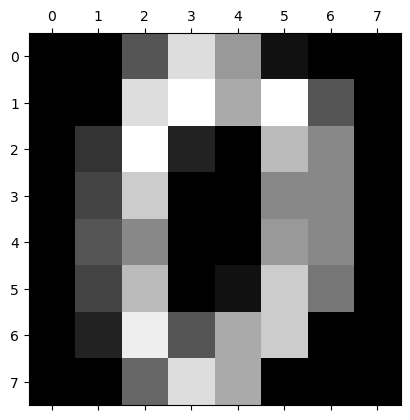

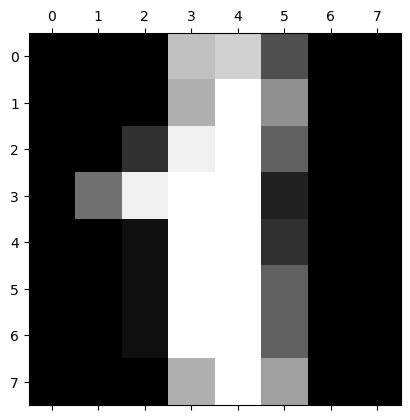

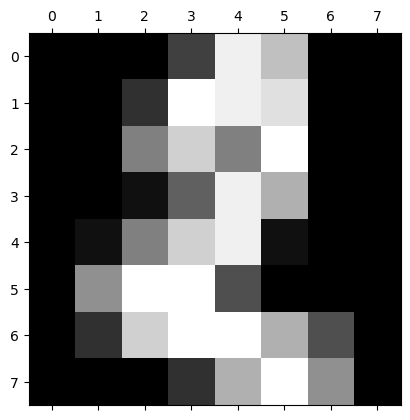

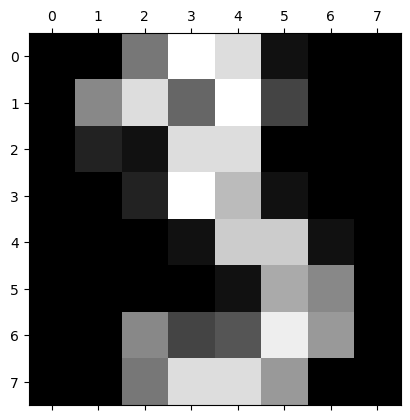

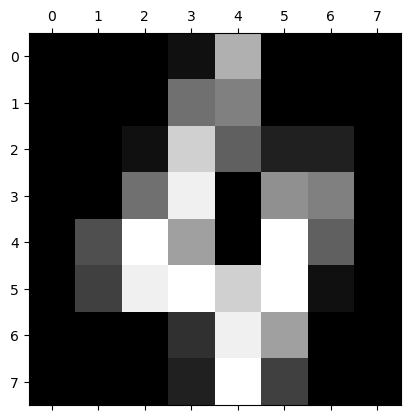

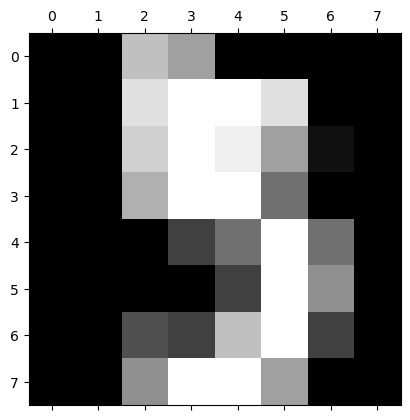

In [19]:
predictions = predict(X, weights, biases)
for i in range(6):
    plt.gray()
    print(f'actual class {y[i]} predicted class {predictions[i]}')
    plt.matshow(digits['images'][i])